# Receiver Operating Characteristic (ROC) with cross validation

**ROC** curves typically feature true positive rate on the **Y** axis, and false positive rate on the **X** axis. This means that the top left corner of the plot is the **ideal** point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (**AUC**) is usually better.

The **steepness** of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output. One ROC
curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

In [28]:
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target

Binarize the output

In [29]:
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

Add noisy features to make the problem harder

In [30]:
import numpy as np

#X = digits.data
#RandomState = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, RandomState.randn(n_samples, 200*n_features)]

Shuffle and split training and test sets

In [59]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                       random_state = 0)

Learn to predict each class against the other

In [60]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(svm.SVC(kernel = 'linear',
                                    probability = True), n_jobs=-1)

In [61]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

Compute ROC curve and ROC area for each class

In [62]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Compute micro-average ROC curve and ROC area

**micro**: <font color='red'> Calculate metrics globally by counting the total true positives, false negatives and false positives.</font>

**macro**: <font color='red'> Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.</font>

In [63]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Plot of a ROC curve for a specific class

Make sure ipython inline mode is activated

In [64]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


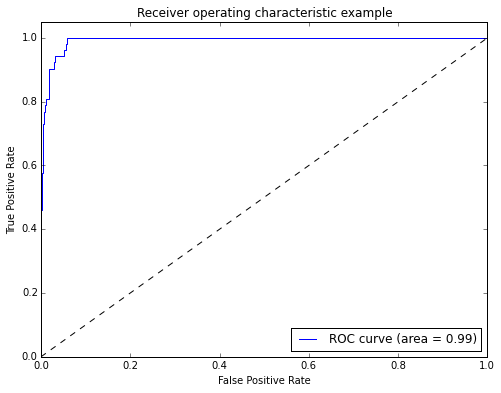

In [65]:
plt.figure(num = None,
       figsize = (8,6),
           dpi = 80,
     facecolor = 'w',
     edgecolor = 'k')

plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel( 'True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])

plt.legend(loc="lower right")
plt.show()

Plot ROC curves for the multiclass problem

Compute macro-average ROC curve and ROC area

First aggregate all false positive rates

In [66]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

Then interpolate all ROC curves at this points

In [67]:
from scipy import interp

mean_tpr = np.zeros_like(all_fpr)

In [68]:
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

Finally average it and compute AUC

In [69]:
mean_tpr /= n_classes

In [70]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

Plot all ROC curves

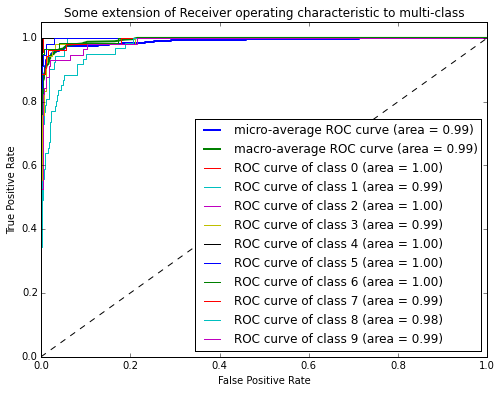

In [72]:
plt.figure(num = None,
       figsize = (8,6),
           dpi = 80,
     facecolor = 'w',
     edgecolor = 'k')

plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel( 'True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]), linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]), linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.legend(loc="lower right")
plt.show()